# COMPRENDRE LES OBJECTIFS DE L'ANALYSE

Fournir une vue complète des données de vente pour l'entreprise de vente au détail
Comment l'entreprise peut-elle optimiser sa stratégie commerciale pour augmenter son chiffre d'affaires et fidéliser sa clientèle ?
Identifier les tendances et les modèles de vente sur différents canaux et produits
Pour obtenir des informations sur les données démographiques et les préférences des clients
Optimiser la performance des ventes en identifiant les opportunités de croissance et d'amélioration


In [1]:
# les bibliotheques

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#  COLLECTE DE DONNEES 

In [2]:
# Chemin du répertoire racine
root_dir = "C:/Users/asus/Desktop/archive"

# Parcours de l'arborescence de répertoires
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        # Chemin complet de chaque fichier trouvé
        file_path = os.path.join(subdir, file)

        print(file_path)

In [3]:
# Input data files are available in the "../input/" directory.
# First let us load the datasets into different Dataframes
def load_data(datapath):
    data = pd.read_csv(datapath)
# Dimensions
    print('Shape:', data.shape)
    # Set of features we have are: date, store, and item
    display(data.sample(10))
    return data
featuresdf=load_data('Features_data_set.csv')
salesdf=load_data('sales_data_set.csv')
storesdf=load_data('stores_data_set.csv')

Shape: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1531,9,15/07/2011,90.45,3.575,NaN,NaN,NaN,NaN,NaN,218.960724,6.404,False
495,3,10/08/2012,85.85,3.494,3375.44,28.4,2.40,1880.43,555.90,225.473509,6.334,False
122,1,08/06/2012,78.30,3.452,8813.81,116.8,64.55,2652.04,7161.91,221.749484,7.143,False
1131,7,05/11/2010,49.44,2.729,NaN,NaN,NaN,NaN,NaN,190.996438,9.137,False
7402,41,08/06/2012,65.11,3.741,10245.25,527.4,78.07,749.73,5117.87,197.655186,6.547,False
1152,7,01/04/2011,24.83,3.461,NaN,NaN,NaN,NaN,NaN,192.269171,8.595,False
1649,10,23/04/2010,66.42,3.050,NaN,NaN,NaN,NaN,NaN,126.471333,9.524,False
3478,20,25/06/2010,75.17,2.808,NaN,NaN,NaN,NaN,NaN,204.567546,7.856,False
6223,35,08/10/2010,57.78,2.764,NaN,NaN,NaN,NaN,NaN,136.627732,8.763,False
5690,32,07/01/2011,23.78,2.882,NaN,NaN,NaN,NaN,NaN,191.368381,8.818,False


Shape: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
367223,39,52,24/02/2012,1550.24,False
226098,23,93,30/04/2010,1143.19,False
110936,12,23,08/04/2011,39175.25,False
36969,4,67,09/12/2011,15218.23,False
236690,24,96,01/04/2011,8325.79,False
144495,15,54,17/12/2010,30.89,False
339588,35,92,02/12/2011,27685.41,False
103508,11,44,13/08/2010,3923.46,False
335889,35,40,03/08/2012,36459.74,False
281369,29,32,01/07/2011,4431.34,False


Shape: (45, 3)


,Store,Type,Size
26,27,A,204184
39,40,A,155083
17,18,B,120653
6,7,B,70713
29,30,C,42988
42,43,C,41062
31,32,A,203007
24,25,B,128107
3,4,A,205863
19,20,A,203742


# NETTOYAGES DES DONNEES

In [4]:
#Fusion des datasets

Maindf1=featuresdf.merge(featuresdf,how='left',indicator=True).merge(storesdf,how='left').merge(salesdf,how='left')
Maindf1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,_merge,Type,Size,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,both,A,151315,1.0,24924.50
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,both,A,151315,2.0,50605.27
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,both,A,151315,3.0,13740.12
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,both,A,151315,4.0,39954.04
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,both,A,151315,5.0,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,both,B,118221,NaN,NaN
423321,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,both,B,118221,NaN,NaN
423322,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,both,B,118221,NaN,NaN
423323,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,both,B,118221,NaN,NaN


*Les valeurs Markdown sont typiquement des facteurs promotionnels et contiennent 58% de valeurs nulles, c'est pourquoi je les évite pour effectuer une analyse soignée.

In [5]:
Maindf2=Maindf1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
Maindf2

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,_merge,Type,Size,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False,both,A,151315,1.0,24924.50
1,1,05/02/2010,42.31,2.572,211.096358,8.106,False,both,A,151315,2.0,50605.27
2,1,05/02/2010,42.31,2.572,211.096358,8.106,False,both,A,151315,3.0,13740.12
3,1,05/02/2010,42.31,2.572,211.096358,8.106,False,both,A,151315,4.0,39954.04
4,1,05/02/2010,42.31,2.572,211.096358,8.106,False,both,A,151315,5.0,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,28/06/2013,76.05,3.639,NaN,NaN,False,both,B,118221,NaN,NaN
423321,45,05/07/2013,77.50,3.614,NaN,NaN,False,both,B,118221,NaN,NaN
423322,45,12/07/2013,79.37,3.614,NaN,NaN,False,both,B,118221,NaN,NaN
423323,45,19/07/2013,82.84,3.737,NaN,NaN,False,both,B,118221,NaN,NaN


In [6]:
#Verification des valeurs aberrantes dans chaque  en tete

Maindf2.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
CPI              585
Unemployment     585
IsHoliday          0
_merge             0
Type               0
Size               0
Dept            1755
Weekly_Sales    1755
dtype: int64

In [7]:
#pour supprimer les valeurs aberrantes
Maindf2.dropna(inplace=True) 
Maindf2.drop_duplicates(inplace=True)


In [8]:
#Verification des valeurs aberrantes dans chaque  en tete

Maindf2.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
_merge          0
Type            0
Size            0
Dept            0
Weekly_Sales    0
dtype: int64

In [9]:
#Chercher les semaines de ventes qui sont negatives et les supprimer 

Maindf2.loc[Maindf2['Weekly_Sales']<=0] 
Maindf3=Maindf2.loc[Maindf2['Weekly_Sales']>0]#un nouvel ensemble de données appelé "Maindf3" qui ne contient que les lignes où la valeur de la colonne "Weekly_Sales" est strictement supérieure à zéro.
Maindf4=Maindf3.drop(['_merge'],axis=1)#une copie de "Maindf3", mais sans la colonne "_merge"
Maindf4.sort_values(by='Date')
Maindf4

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,1.0,24924.50
1,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,2.0,50605.27
2,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,3.0,13740.12
3,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,4.0,39954.04
4,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,5.0,32229.38
...,...,...,...,...,...,...,...,...,...,...,...
423281,45,26/10/2012,58.85,3.882,192.308899,8.667,False,B,118221,93.0,2487.80
423282,45,26/10/2012,58.85,3.882,192.308899,8.667,False,B,118221,94.0,5203.31
423283,45,26/10/2012,58.85,3.882,192.308899,8.667,False,B,118221,95.0,56017.47
423284,45,26/10/2012,58.85,3.882,192.308899,8.667,False,B,118221,97.0,6817.48


# EXPLORATION DES DONNEES

In [10]:
# Affichage des premières lignes de données
Maindf4.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,1.0,24924.50
1,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,2.0,50605.27
2,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,3.0,13740.12
3,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,4.0,39954.04
4,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,5.0,32229.38


In [11]:
# Affichage des dimensions des données
Maindf4.shape

(420212, 11)

In [12]:
# Affichage des statistiques descriptives
Maindf4.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Weekly_Sales
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,60.090599,3.360890,171.212496,7.960000,136749.732787,44.241309,16033.114591
std,12.787236,18.447857,0.458519,39.162445,1.863879,60993.084568,30.508819,22729.492116
min,1.000000,-2.060000,2.472000,126.064000,3.879000,34875.000000,1.000000,0.010000
25%,11.000000,46.680000,2.933000,132.022667,6.891000,93638.000000,18.000000,2120.130000
50%,22.000000,62.090000,3.452000,182.350989,7.866000,140167.000000,37.000000,7661.700000
75%,33.000000,74.280000,3.738000,212.445487,8.567000,202505.000000,74.000000,20271.265000
max,45.000000,100.140000,4.468000,227.232807,14.313000,219622.000000,99.000000,693099.360000


In [13]:
Maindf4['Type'].unique() #Store varities

array(['A', 'B', 'C'], dtype=object)

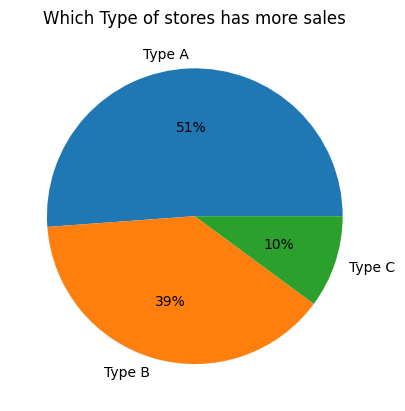

In [14]:
#visualiser la répartition des différents types de magasins

stores = ['Type A','Type B','Type C']

data = Maindf4['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(data, labels = stores,autopct='%.0f%%')
ax.set_title('Which Type of stores has more sales')
# show plot
plt.show()

In [15]:
Maindf4['year'] = pd.DatetimeIndex(Maindf4['Date']).year #Separating year data.

**Correlation 1**

                 Store  Temperature  Fuel_Price       CPI  Unemployment  \
Store         1.000000    -0.050230    0.065321 -0.211261      0.208759   
Temperature  -0.050230     1.000000    0.143700  0.182223      0.096768   
Fuel_Price    0.065321     0.143700    1.000000 -0.164199     -0.033915   
CPI          -0.211261     0.182223   -0.164199  1.000000     -0.299887   
Unemployment  0.208759     0.096768   -0.033915 -0.299887      1.000000   
IsHoliday    -0.000522    -0.155775   -0.078155 -0.001933      0.010555   
Size         -0.182763    -0.058413    0.003632 -0.003903     -0.068335   
Dept          0.024258     0.004727    0.003544 -0.007178      0.007787   
Weekly_Sales -0.085117    -0.002339    0.000089 -0.021162     -0.025806   
year          0.002831     0.065712    0.779681  0.074547     -0.237210   

              IsHoliday      Size      Dept  Weekly_Sales      year  
Store         -0.000522 -0.182763  0.024258     -0.085117  0.002831  
Temperature   -0.155775 -0.058413 

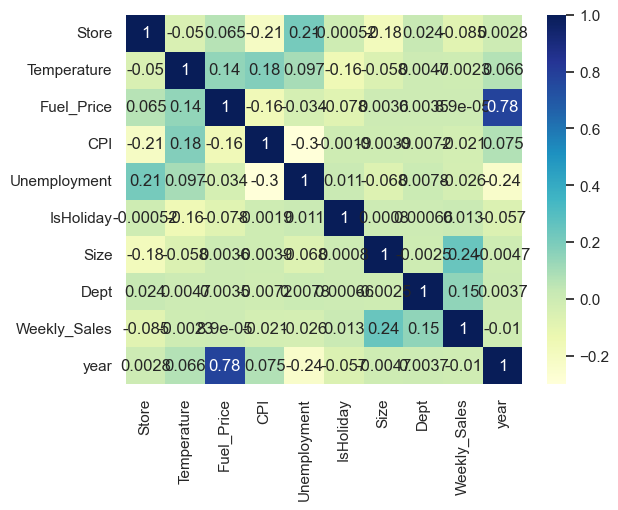

In [16]:
#es relations entre les variables (correlation) identifier les variables qui ont une forte association entre elles

data = Maindf4   #variable globale
print(data.corr()) 
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(30,10)})

plt.show()

In [17]:
Maindf4.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Type             object
Size              int64
Dept            float64
Weekly_Sales    float64
year              int64
dtype: object

In [18]:
Maindf4.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Weekly_Sales,year
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,60.090599,3.360890,171.212496,7.960000,136749.732787,44.241309,16033.114591,2010.968454
std,12.787236,18.447857,0.458519,39.162445,1.863879,60993.084568,30.508819,22729.492116,0.796898
min,1.000000,-2.060000,2.472000,126.064000,3.879000,34875.000000,1.000000,0.010000,2010.000000
25%,11.000000,46.680000,2.933000,132.022667,6.891000,93638.000000,18.000000,2120.130000,2010.000000
50%,22.000000,62.090000,3.452000,182.350989,7.866000,140167.000000,37.000000,7661.700000,2011.000000
75%,33.000000,74.280000,3.738000,212.445487,8.567000,202505.000000,74.000000,20271.265000,2012.000000
max,45.000000,100.140000,4.468000,227.232807,14.313000,219622.000000,99.000000,693099.360000,2012.000000


**Year vs Fuel_price**

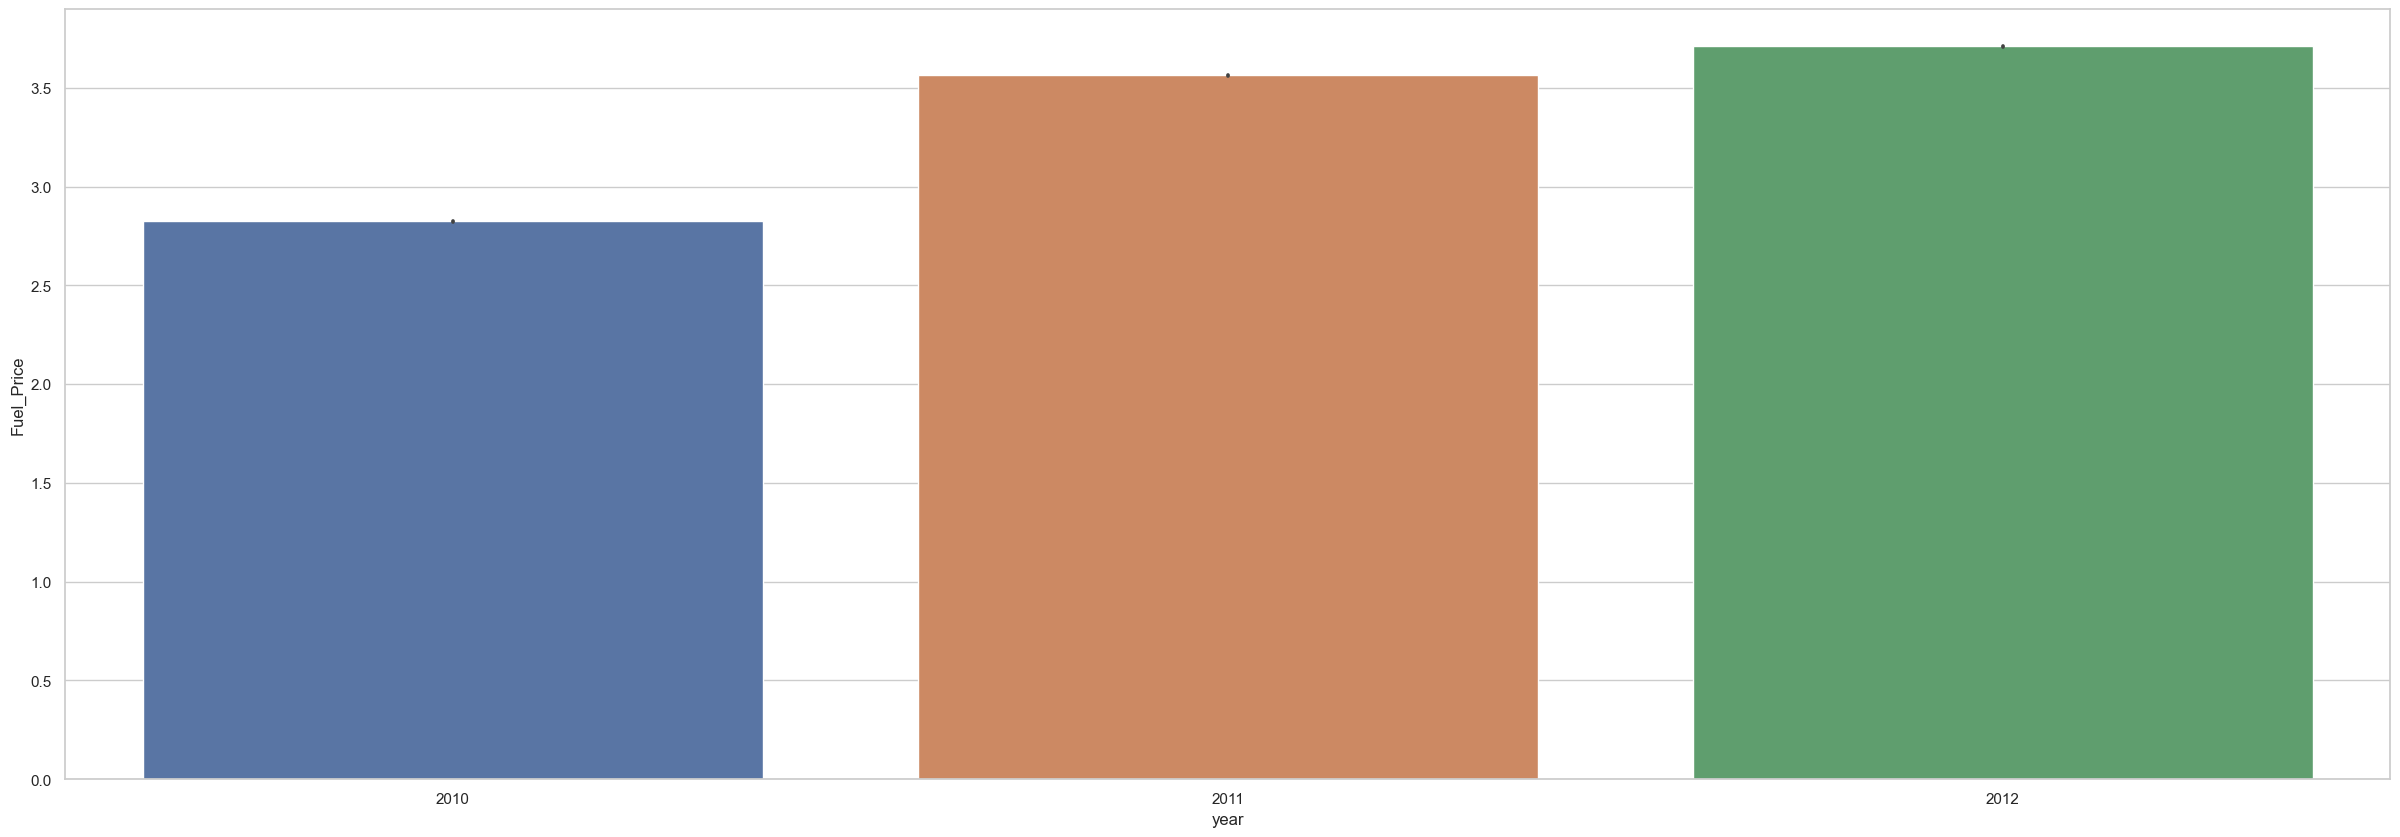

In [19]:
# la relation entre les années et le prix du carburant ==> variation

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="year", y="Fuel_Price", data=data)
sns.set(rc = {'figure.figsize':(30,8)})


**Weekly sales vs Store**

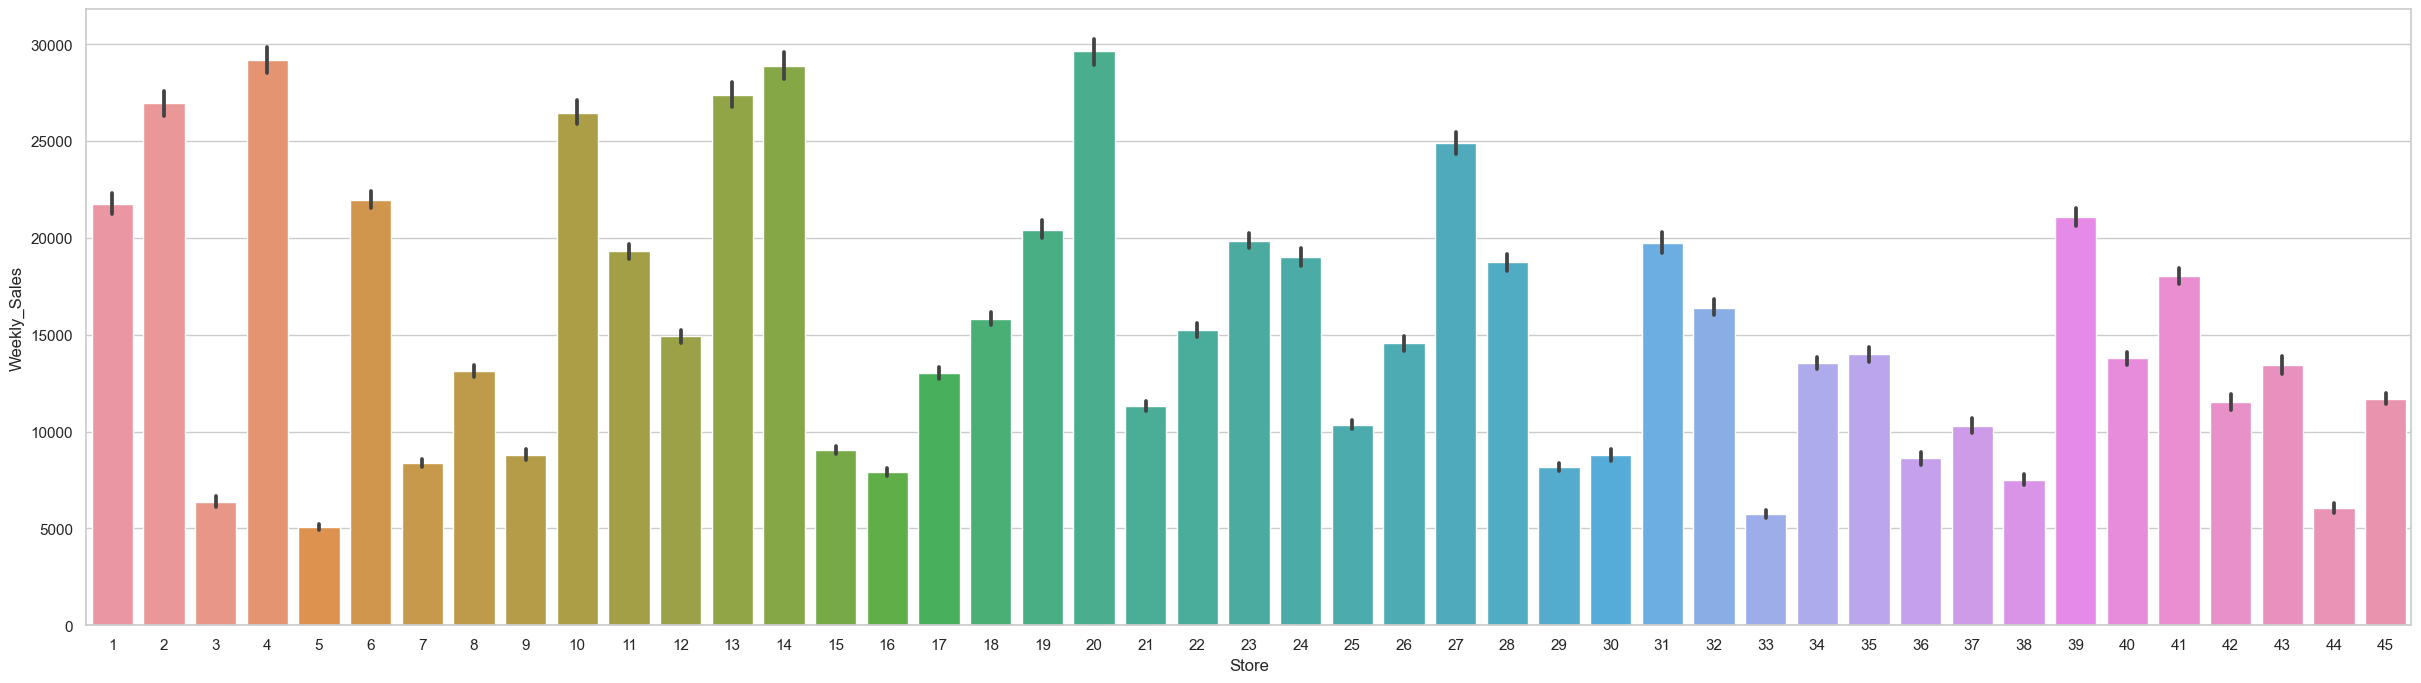

In [20]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Store', y="Weekly_Sales", data=data)
sns.set(rc = {'figure.figsize':(30,8)})


In [21]:
Maindf4

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,year
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,1.0,24924.50,2010
1,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,2.0,50605.27,2010
2,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,3.0,13740.12,2010
3,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,4.0,39954.04,2010
4,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,5.0,32229.38,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
423281,45,26/10/2012,58.85,3.882,192.308899,8.667,False,B,118221,93.0,2487.80,2012
423282,45,26/10/2012,58.85,3.882,192.308899,8.667,False,B,118221,94.0,5203.31,2012
423283,45,26/10/2012,58.85,3.882,192.308899,8.667,False,B,118221,95.0,56017.47,2012
423284,45,26/10/2012,58.85,3.882,192.308899,8.667,False,B,118221,97.0,6817.48,2012


**RECHERCHE DES ELEMENTS DISTINCTS**

In [22]:
Maindf4['Dept'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 40., 41.,
       42., 44., 45., 46., 47., 48., 49., 51., 52., 54., 55., 56., 58.,
       59., 60., 67., 71., 72., 74., 79., 80., 81., 82., 83., 85., 87.,
       90., 91., 92., 93., 94., 95., 97., 98., 78., 96., 99., 77., 39.,
       50., 43., 65.])

**Dept vs Weekly_Sales**

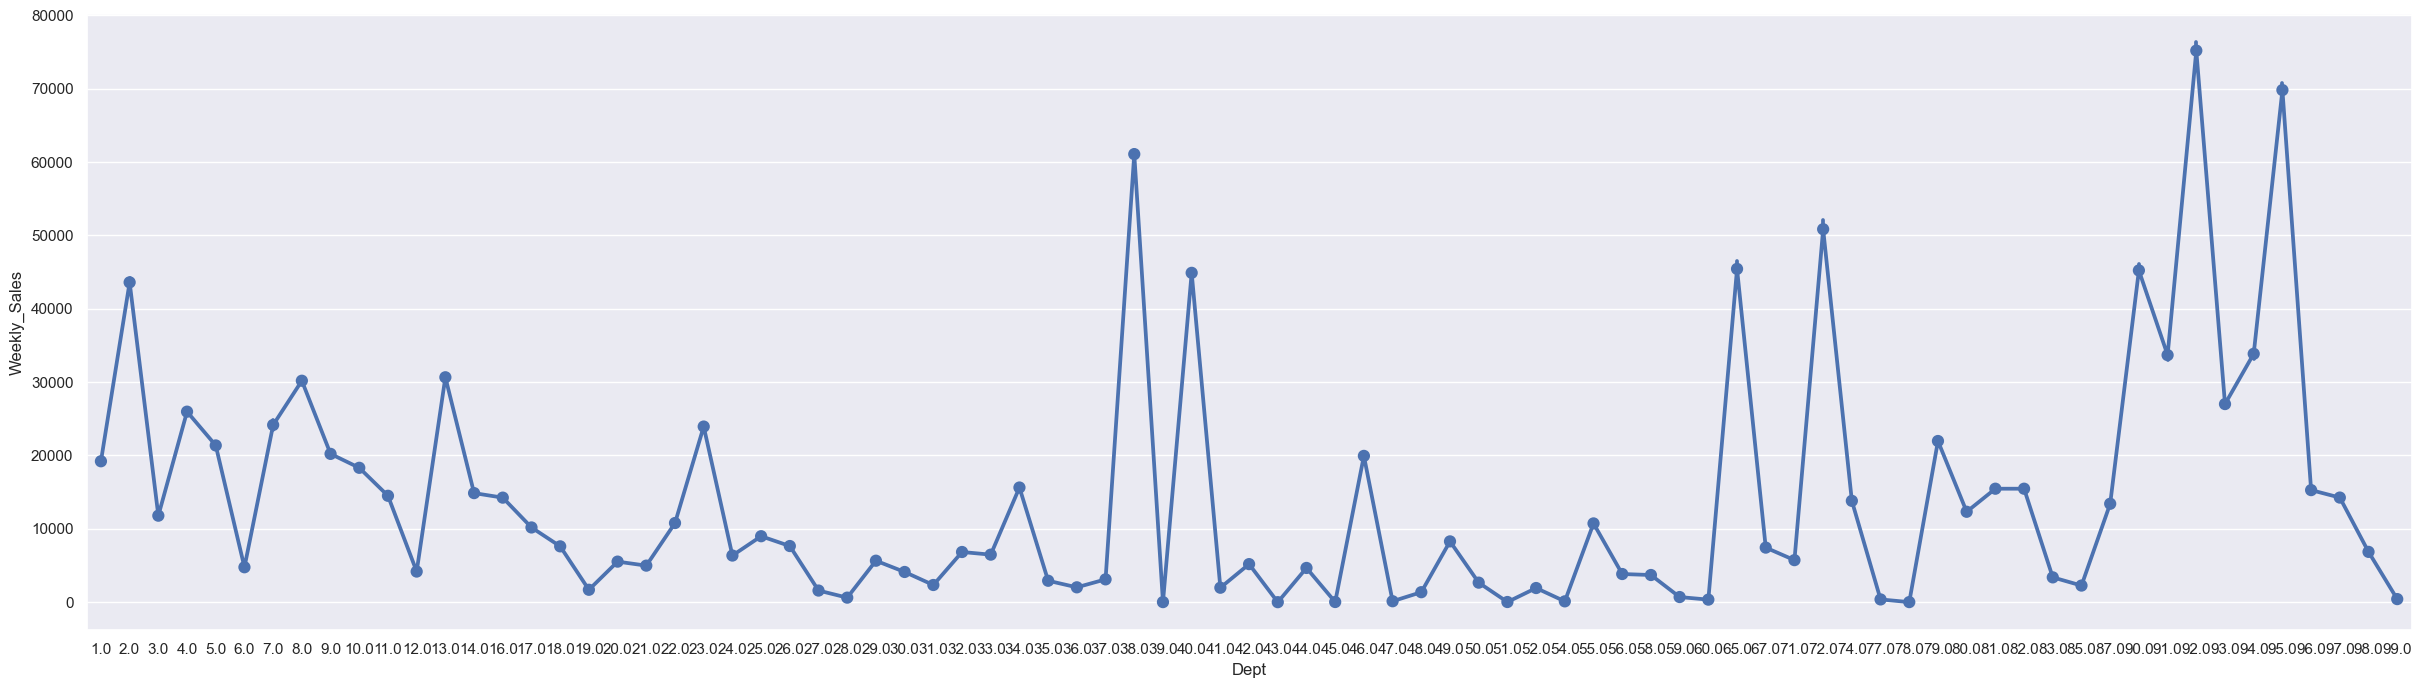

In [23]:
sns.pointplot(x ='Dept',
			y = "Weekly_Sales",
			data = data)
# show the plot
plt.show()


In [24]:
Maindf4

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,year
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,1.0,24924.50,2010
1,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,2.0,50605.27,2010
2,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,3.0,13740.12,2010
3,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,4.0,39954.04,2010
4,1,05/02/2010,42.31,2.572,211.096358,8.106,False,A,151315,5.0,32229.38,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
423281,45,26/10/2012,58.85,3.882,192.308899,8.667,False,B,118221,93.0,2487.80,2012
423282,45,26/10/2012,58.85,3.882,192.308899,8.667,False,B,118221,94.0,5203.31,2012
423283,45,26/10/2012,58.85,3.882,192.308899,8.667,False,B,118221,95.0,56017.47,2012
423284,45,26/10/2012,58.85,3.882,192.308899,8.667,False,B,118221,97.0,6817.48,2012


**Remplacez Date par MOIS ET SEMAINES POUR DETERMINER LES TENDANCES**

In [25]:
#il crée deux nouvelles colonnes dans le dataframe Maindf4 à partir de la colonne Date.
# La première colonne month contient le numéro du mois correspondant à chaque date,
# et la deuxième colonne week contient le numéro de la semaine correspondant à chaque date
Maindf4['month'] = pd.DatetimeIndex(Maindf4['Date']).month #extract month data
Maindf4['week'] = pd.DatetimeIndex(Maindf4['Date']).week #extract week data
Maindf5=Maindf4.drop(['Date'],axis=1)
# pour determiner les tendances saisonnières ou hebdomadaires 
Maindf5

c:\Users\asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,year,month,week
0,1,42.31,2.572,211.096358,8.106,False,A,151315,1.0,24924.50,2010,5,17
1,1,42.31,2.572,211.096358,8.106,False,A,151315,2.0,50605.27,2010,5,17
2,1,42.31,2.572,211.096358,8.106,False,A,151315,3.0,13740.12,2010,5,17
3,1,42.31,2.572,211.096358,8.106,False,A,151315,4.0,39954.04,2010,5,17
4,1,42.31,2.572,211.096358,8.106,False,A,151315,5.0,32229.38,2010,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423281,45,58.85,3.882,192.308899,8.667,False,B,118221,93.0,2487.80,2012,10,43
423282,45,58.85,3.882,192.308899,8.667,False,B,118221,94.0,5203.31,2012,10,43
423283,45,58.85,3.882,192.308899,8.667,False,B,118221,95.0,56017.47,2012,10,43
423284,45,58.85,3.882,192.308899,8.667,False,B,118221,97.0,6817.48,2012,10,43


**DETERMINER LES VENTES MENSUELLES**

<AxesSubplot:xlabel='month'>

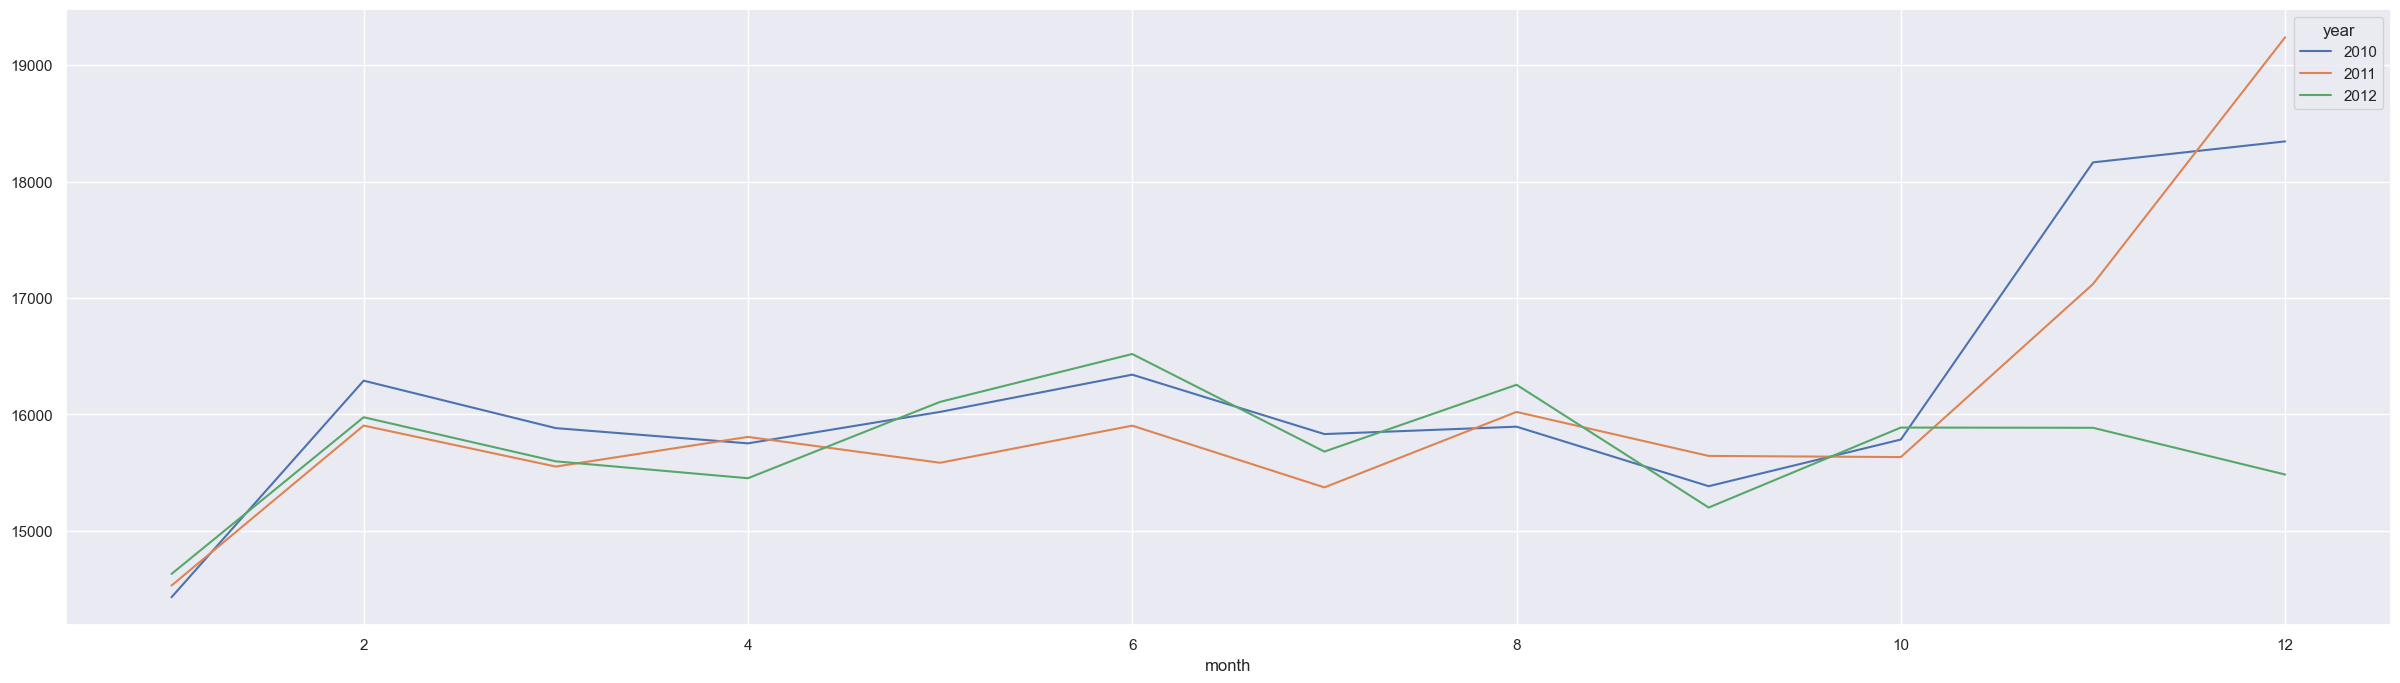

In [26]:
month_sales = pd.pivot_table(Maindf5, values = "Weekly_Sales", columns = "year", index = "month")
month_sales.plot()

**Label encoding for Holiday column and Type**

In [27]:
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
Maindf5['IsHoliday']= label_encoder.fit_transform(Maindf5['IsHoliday'])
Maindf5['Type']= label_encoder.fit_transform(Maindf5['Type'])

Maindf5

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,year,month,week
0,1,42.31,2.572,211.096358,8.106,0,0,151315,1.0,24924.50,2010,5,17
1,1,42.31,2.572,211.096358,8.106,0,0,151315,2.0,50605.27,2010,5,17
2,1,42.31,2.572,211.096358,8.106,0,0,151315,3.0,13740.12,2010,5,17
3,1,42.31,2.572,211.096358,8.106,0,0,151315,4.0,39954.04,2010,5,17
4,1,42.31,2.572,211.096358,8.106,0,0,151315,5.0,32229.38,2010,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423281,45,58.85,3.882,192.308899,8.667,0,1,118221,93.0,2487.80,2012,10,43
423282,45,58.85,3.882,192.308899,8.667,0,1,118221,94.0,5203.31,2012,10,43
423283,45,58.85,3.882,192.308899,8.667,0,1,118221,95.0,56017.47,2012,10,43
423284,45,58.85,3.882,192.308899,8.667,0,1,118221,97.0,6817.48,2012,10,43


**Correlation 2**

                 Store  Temperature  Fuel_Price       CPI  Unemployment  \
Store         1.000000    -0.050230    0.065321 -0.211261      0.208759   
Temperature  -0.050230     1.000000    0.143700  0.182223      0.096768   
Fuel_Price    0.065321     0.143700    1.000000 -0.164199     -0.033915   
CPI          -0.211261     0.182223   -0.164199  1.000000     -0.299887   
Unemployment  0.208759     0.096768   -0.033915 -0.299887      1.000000   
IsHoliday    -0.000522    -0.155775   -0.078155 -0.001933      0.010555   
Type          0.226352     0.043035    0.029483 -0.065094      0.148793   
Size         -0.182763    -0.058413    0.003632 -0.003903     -0.068335   
Dept          0.024258     0.004727    0.003544 -0.007178      0.007787   
Weekly_Sales -0.085117    -0.002339    0.000089 -0.021162     -0.025806   
year          0.002831     0.065712    0.779681  0.074547     -0.237210   
month         0.000134     0.065848   -0.052019  0.001684     -0.001875   
week          0.000188   

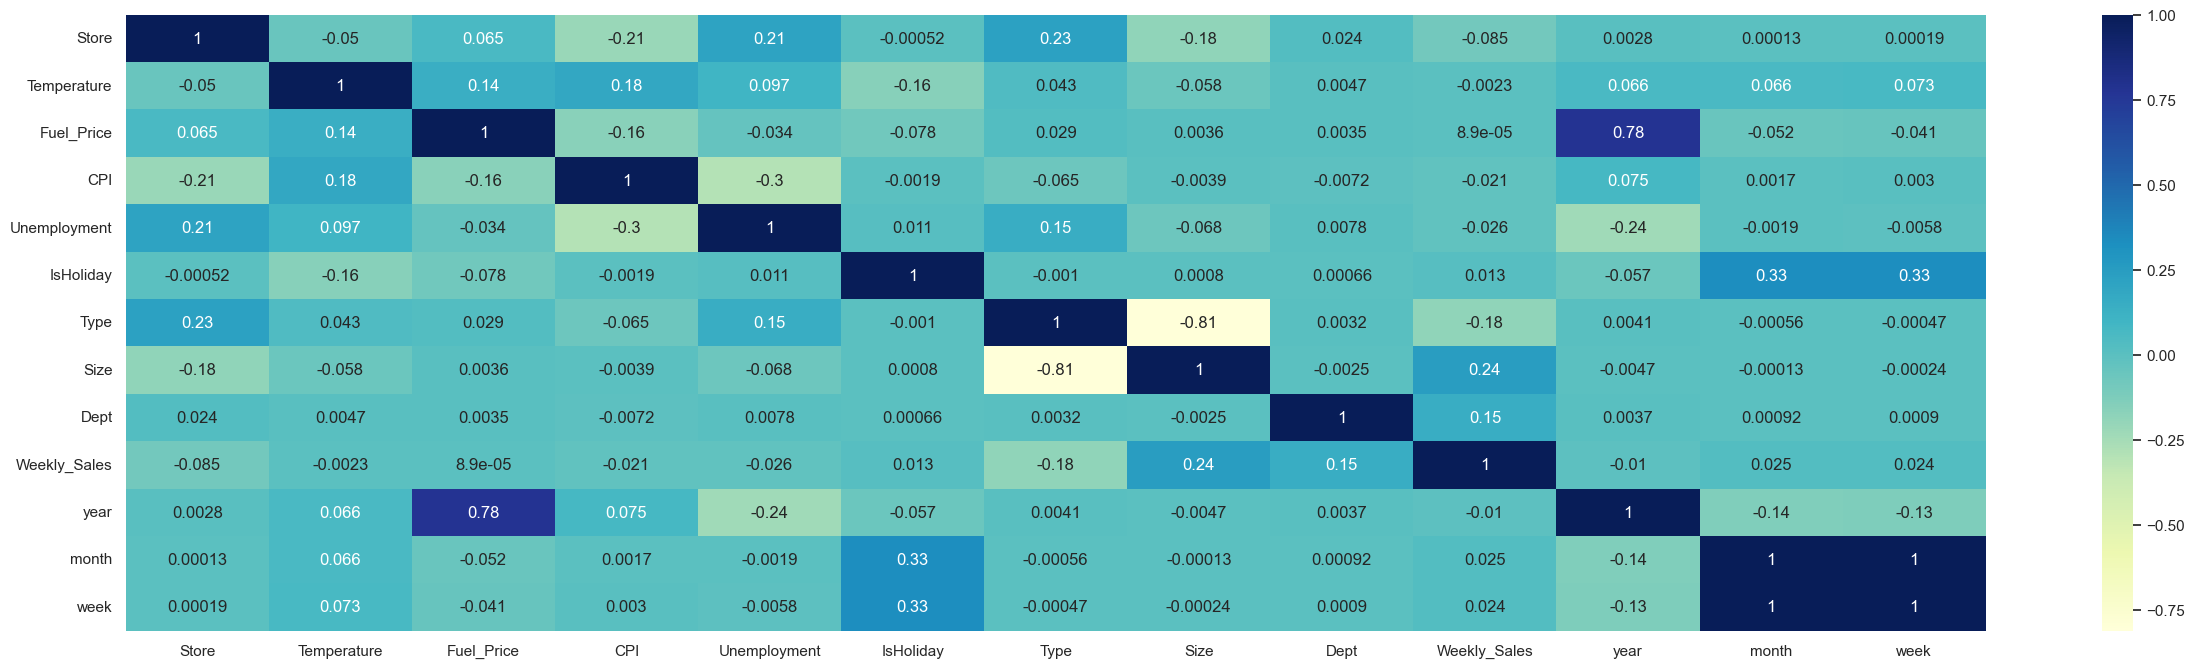

In [28]:
print(Maindf5.corr()) 
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(Maindf5.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(30,8)})

plt.show()

In [29]:
# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Maindf5)

# Création du modèle de clustering avec K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_scaled)

# Obtention des prédictions de cluster pour chaque observation
clusters = kmeans.predict(data_scaled)

# Affichage des centres de chaque cluster
kmeans.cluster_centers_

array([[-6.93968815e-04,  5.24094246e-01,  8.75214033e-01,
         7.36620297e-02, -2.03198642e-01, -2.07068882e-01,
         1.17667380e-02, -1.12956634e-02,  3.35767724e-03,
        -9.57133984e-03,  7.93074177e-01,  6.28425291e-02,
         7.64522195e-02],
       [-8.01271254e-03, -1.39280241e-01, -7.22918020e-01,
        -2.31841665e-02,  1.58462747e-01,  5.69170283e-01,
        -2.55980898e-03, -7.95385692e-04,  5.85452412e-04,
         4.25922838e-02, -7.67624519e-01,  1.00294394e+00,
         9.95014793e-01],
       [ 8.70518711e-03, -5.66616202e-01, -4.70386632e-01,
        -7.61369853e-02,  1.18309968e-01, -2.75078843e-01,
        -1.32719114e-02,  1.58971751e-02, -5.06420101e-03,
        -2.85173267e-02, -3.17013030e-01, -1.05745550e+00,
        -1.06798451e+00]])